In [1]:
import pandas as pd

In [2]:
#covidData = pd.read_excel("../database/database-pp-pacientes-uti.xlsx")
covidData = pd.read_excel("../database/database-pp-pacientes10-uti.xlsx")

In [3]:
covidData

,CS_SEXO,NU_IDADE_N,CS_RACA,SURTO_SG,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,...,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,CLASSI_FIN,IMUNODEPRE,RENAL,OBESIDADE,UTI
0,0,CRIANCA,NaN,2.0,1.0,1.0,NaN,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,2
1,1,ADULTO1,4.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,4,2.0,1.0,2.0,2
2,1,IDOSO3,4.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,...,2.0,2.0,1.0,2.0,2.0,4,2.0,1.0,2.0,1
3,1,IDOSO1,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1,2.0,2.0,2.0,2
4,0,ADULTO4,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,5,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,0,IDOSO2,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,4,NaN,NaN,NaN,1
1102,1,IDOSO1,4.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,1.0,NaN,5,NaN,NaN,NaN,1
1103,0,IDOSO2,4.0,2.0,NaN,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,4,NaN,NaN,NaN,2
1104,0,IDOSO3,4.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,...,NaN,NaN,1.0,1.0,NaN,5,NaN,NaN,NaN,2


In [4]:
#for column in covidData:
#    print(column)

In [5]:
# Calculando os faltantes
faltantes = covidData.isnull().sum()
faltantes_percentual = (covidData.isnull().sum() / len(covidData['CS_SEXO'])) * 100

In [6]:
# Identificando a quantidade dos dados faltantes
qnt_faltantes = []
#nome_colunas = []

attributes = ["CS_SEXO", "NU_IDADE_N", "CS_RACA", "SURTO_SG", "FEBRE", "TOSSE", "GARGANTA", 
              "DISPNEIA", "DESC_RESP", "SATURACAO", "DIARREIA","VOMITO", "FATOR_RISC", "PUERPERA", "CARDIOPATI", 
              "HEMATOLOGI", "SIND_DOWN", "HEPATICA", "ASMA", "DIABETES", "NEUROLOGIC","PNEUMOPATI", "CLASSI_FIN",
              "IMUNODEPRE", "RENAL", "OBESIDADE", "UTI"]

for column in attributes:
 qnt_faltantes.append(faltantes_percentual[column])
 print(column,  ":", faltantes_percentual[column])

#qnt_faltantes

CS_SEXO : 0.0
NU_IDADE_N : 0.0
CS_RACA : 1.4466546112115732
SURTO_SG : 3.79746835443038
FEBRE : 13.652802893309223
TOSSE : 10.57866184448463
GARGANTA : 32.91139240506329
DISPNEIA : 7.323688969258589
DESC_RESP : 15.370705244122965
SATURACAO : 16.817359855334537
DIARREIA : 34.0867992766727
VOMITO : 35.714285714285715
FATOR_RISC : 0.09041591320072333
PUERPERA : 63.01989150090416
CARDIOPATI : 34.53887884267631
HEMATOLOGI : 62.83905967450272
SIND_DOWN : 63.47197106690777
HEPATICA : 61.84448462929476
ASMA : 61.66365280289331
DIABETES : 35.2622061482821
NEUROLOGIC : 60.75949367088608
PNEUMOPATI : 59.76491862567812
CLASSI_FIN : 0.0
IMUNODEPRE : 61.66365280289331
RENAL : 60.57866184448463
OBESIDADE : 59.40325497287523
UTI : 0.0


In [7]:
# Atributos com mais de 60% dos dados faltantes - Também retirei o Classi_fin
atributos_faltosos = ["PUERPERA", "HEMATOLOGI", "SIND_DOWN", "HEPATICA", "ASMA", "NEUROLOGIC", 
                      "PNEUMOPATI", "IMUNODEPRE", "RENAL", "OBESIDADE", "CLASSI_FIN"]

# Atributos sem valores NaN "CS_SEXO", "NU_IDADE_N", "FATOR_RISC" e "UTI"
atributos_restantes = ["CS_SEXO", "SURTO_SG", "NU_IDADE_N", "CS_RACA", "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", 
                       "DESC_RESP", "SATURACAO", "DIARREIA", "VOMITO", "FATOR_RISC", "CARDIOPATI", "DIABETES", "UTI"]

#atributos_com_menos_faltosos = ["CS_RACA", "CS_RACA", "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "DESC_RESP", "SATURACAO",
#                      "DIARREIA", "VOMITO", "CARDIOPATI", "DIABETES"]

In [8]:
# Definindo o novo DataBase sem os atributos > 60% NaN
newCovidData = covidData[atributos_restantes]
newCovidData.head()

,CS_SEXO,SURTO_SG,NU_IDADE_N,CS_RACA,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,FATOR_RISC,CARDIOPATI,DIABETES,UTI
0,0,2.0,CRIANCA,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2
1,1,2.0,ADULTO1,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2
2,1,2.0,IDOSO3,4.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1
3,1,2.0,IDOSO1,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2
4,0,2.0,ADULTO4,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1


In [9]:
# Verificando a quantidade de valores vazios de Tosse
print("Valores NaN de Tosse: ", newCovidData["TOSSE"].isna().sum())
print("Valores NaN de Garganta: ", newCovidData["GARGANTA"].isna().sum())

# newCovidData["TOSSE"].value_counts()

Valores NaN de Tosse:  117
Valores NaN de Garganta:  364


In [10]:
# Trocando os valores NaN por 2
valor = 2;

atributos_com_menos_faltosos = {"CS_RACA": valor, "SURTO_SG": valor, 'FEBRE': valor, "TOSSE": valor, "GARGANTA": valor, 
                                "DISPNEIA": valor, "DESC_RESP": valor, "SATURACAO": valor, "DIARREIA": valor, 
                                "VOMITO": valor, "CARDIOPATI": valor, "DIABETES": valor, "FATOR_RISC": valor}

covidDataWithoutNaN = newCovidData.fillna(atributos_com_menos_faltosos, inplace = False)

In [11]:
covidDataWithoutNaN.head()

,CS_SEXO,SURTO_SG,NU_IDADE_N,CS_RACA,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,FATOR_RISC,CARDIOPATI,DIABETES,UTI
0,0,2.0,CRIANCA,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2
1,1,2.0,ADULTO1,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2
2,1,2.0,IDOSO3,4.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1
3,1,2.0,IDOSO1,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2
4,0,2.0,ADULTO4,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1


In [12]:
# Verificando a quantidade de valores vazios de Tosse
print("Valores NaN de Tosse: ", covidDataWithoutNaN["TOSSE"].isna().sum())
print("Valores NaN de Garganta: ", covidDataWithoutNaN["GARGANTA"].isna().sum())

# newCovidData["TOSSE"].value_counts()

Valores NaN de Tosse:  0
Valores NaN de Garganta:  0


In [13]:
# Verificando se os dados NaN foram excluídos
covidDataWithoutNaN["TOSSE"].value_counts()

1.0    810
2.0    292
9.0      4
Name: TOSSE, dtype: int64

In [14]:
nine_values = {9 : 2}

atributos_ds = ["CS_SEXO", "SURTO_SG", "NU_IDADE_N", "CS_RACA", "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", 
                       "DESC_RESP", "SATURACAO", "DIARREIA", "VOMITO", "FATOR_RISC", "CARDIOPATI", "DIABETES"]

covidDataWithoutNaN[atributos_ds] = covidDataWithoutNaN[atributos_ds].replace(9.0, 2)


#for atributos in atributos_ds:
# covidDataWithoutNaN[atributos] = covidDataWithoutNaN[atributos].map(nine_values)

#covidDataWithoutNaN.head()

In [15]:
covidDataWithoutNaN.head()

,CS_SEXO,SURTO_SG,NU_IDADE_N,CS_RACA,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,FATOR_RISC,CARDIOPATI,DIABETES,UTI
0,0,2.0,CRIANCA,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2
1,1,2.0,ADULTO1,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2
2,1,2.0,IDOSO3,4.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1
3,1,2.0,IDOSO1,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2
4,0,2.0,ADULTO4,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1


In [16]:
# Verificando se os dados NaN foram excluídos
covidDataWithoutNaN["TOSSE"].value_counts()

1.0    810
2.0    296
Name: TOSSE, dtype: int64

In [17]:
#Substituindo as idades por classificação
#idade_valores = {'CRIANCA': 0, 'JOVEM': 1, 'ADULTO1': 2, 'ADULTO2': 3, 'ADULTO3': 4, 'IDOSO1': 5, 'IDOSO2': 6, 'IDOSO3': 7}
idade_valores = {'CRIANCA': 0, 'JOVEM': 1, 'ADULTO1': 2, 'ADULTO2': 3, 'ADULTO3': 4, 'ADULTO4': 5, 
                 'IDOSO1': 6, 'IDOSO2': 7, 'IDOSO3': 8, 'IDOSO4': 9}

covidDataWithoutNaN['NU_IDADE_N'] = covidDataWithoutNaN['NU_IDADE_N'].map(idade_valores)
covidDataWithoutNaN.head()

,CS_SEXO,SURTO_SG,NU_IDADE_N,CS_RACA,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,FATOR_RISC,CARDIOPATI,DIABETES,UTI
0,0,2.0,0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2
1,1,2.0,2,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2
2,1,2.0,8,4.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1
3,1,2.0,6,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2
4,0,2.0,5,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1


In [6]:
# 20 Atributos
#attributes = ["NU_IDADE_N", "CS_RACA", "FEBRE", "TOSSE", "GARGANTA", "QNT_DIAS", "DISPNEIA", "DESC_RESP", 
#              "FATOR_RISC", "SURTO_SG", "CARDIOPATI", "DIABETES", "PNEUMOPATI", "SATURACAO", 
#                "DIARREIA", "VOMITO", "OBESIDADE", "UTI", "SUPORT_VEN", "EVOLUCAO"]

# 16 Atributos
#attributes = ["NU_IDADE_N", "CS_RACA", "FEBRE", "TOSSE", "GARGANTA", "QNT_DIAS", "DISPNEIA", "DESC_RESP", "FATOR_RISC", 
#               "SATURACAO", "DIARREIA","VOMITO", "OBESIDADE", "UTI", "SUPORT_VEN", "EVOLUCAO"]


#covidDataFormat = covidData[attributes]
#covidDataFormat = covidData
#covidDataFormat

,CS_SEXO,NU_IDADE_N,CS_RACA,SURTO_SG,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,...,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,UTI,SUPORT_VEN,DT_INTERNA,DT_EVOLUCA,EVOLUCAO
0,0,4,9,2,1,1,2,1,1,1,...,2,2,2,2,2,2,3,2020-03-11 00:00:00,13/03/2020,1
1,1,20,4,2,1,1,2,1,1,1,...,2,2,2,1,2,2,2,2020-03-15 00:00:00,31/03/2020,1
2,1,84,4,2,2,1,2,1,1,1,...,2,2,2,1,2,1,2,2020-03-17 00:00:00,01/04/2020,1
3,1,62,4,2,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2020-03-13 00:00:00,22/03/2020,1
4,0,50,4,2,1,1,1,1,1,1,...,2,2,2,2,2,1,2,2020-03-20 00:00:00,11/04/2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,0,81,1,2,2,1,2,1,1,1,...,2,1,2,2,2,2,2,2020-08-28 00:00:00,29/08/2020,2
967,0,67,1,2,1,2,2,1,2,1,...,2,2,2,2,2,2,3,2020-08-28 00:00:00,01/09/2020,1
968,1,58,4,2,2,1,1,1,1,1,...,1,2,2,2,2,1,2,02/09/2020,02/09/2020,2
969,0,73,4,2,2,1,2,1,2,1,...,2,1,2,2,2,2,2,2020-08-25 00:00:00,31/08/2020,1


# Convertendo o valor dos atributos

In [34]:
#Substituindo os dias por classificação

covidDataFormat['QNT_DIAS'].replace(0, 0, inplace = True)

for i in range (1, 8):
    covidDataFormat['QNT_DIAS'].replace(i, 1, inplace = True)
    
for i in range (8, 15):
    covidDataFormat['QNT_DIAS'].replace(i, 2, inplace = True)
    
for i in range (15, 22):
    covidDataFormat['QNT_DIAS'].replace(i, 3, inplace = True)

for i in range (22, 29):
    covidDataFormat['QNT_DIAS'].replace(i, 4, inplace = True)

for i in range (29, 36):
    covidDataFormat['QNT_DIAS'].replace(i, 5, inplace = True)

for i in range (36, 43):
    covidDataFormat['QNT_DIAS'].replace(i, 6, inplace = True)

for i in range (43, 50):
    covidDataFormat['QNT_DIAS'].replace(i, 7, inplace = True)

for i in range (50, 200):
    covidDataFormat['QNT_DIAS'].replace(i, 8, inplace = True)

In [35]:
covidDataFormat.head()

,CS_SEXO,NU_IDADE_N,CS_RACA,SURTO_SG,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,...,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,UTI,SUPORT_VEN,EVOLUCAO,QNT_DIAS
0,0,ADULTO3,4,2,1,1,1,1,1,1,...,2,2,2,2,2,2,1,2,1,4
1,1,IDOSO1,4,2,1,1,1,1,1,1,...,1,2,2,2,2,2,2,2,1,1
2,1,ADULTO3,4,2,1,1,2,1,1,1,...,2,2,2,2,2,2,2,1,2,1
3,1,ADULTO3,4,2,1,1,2,1,1,1,...,1,2,2,2,2,2,1,1,2,2
4,1,IDOSO1,4,2,1,1,2,1,1,1,...,2,2,2,2,2,2,2,2,1,1


In [36]:
#Substituindo as idades por classificação
idade_valores = {'CRIANCA': 0, 'JOVEM': 1, 'ADULTO1': 2, 'ADULTO2': 3, 'ADULTO3': 4, 'IDOSO1': 5, 'IDOSO2': 6, 'IDOSO3': 7}

covidDataFormat['NU_IDADE_N'] = covidDataFormat['NU_IDADE_N'].map(idade_valores)
covidDataFormat.head()

,CS_SEXO,NU_IDADE_N,CS_RACA,SURTO_SG,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,...,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,UTI,SUPORT_VEN,EVOLUCAO,QNT_DIAS
0,0,4,4,2,1,1,1,1,1,1,...,2,2,2,2,2,2,1,2,1,4
1,1,5,4,2,1,1,1,1,1,1,...,1,2,2,2,2,2,2,2,1,1
2,1,4,4,2,1,1,2,1,1,1,...,2,2,2,2,2,2,2,1,2,1
3,1,4,4,2,1,1,2,1,1,1,...,1,2,2,2,2,2,1,1,2,2
4,1,5,4,2,1,1,2,1,1,1,...,2,2,2,2,2,2,2,2,1,1


In [37]:
# Trocando o nome da coluna QNT_DIAS
covidDataFormat = covidDataFormat.rename(columns={'QNT_DIAS': 'QNT_SEMANAS'})

# Trocando os valores de NU_IDADE_N
# Ta sendo feito acima
#valores = ['ADULTO1', 'ADULTO2', 'ADULTO3']
#novosValores = [1, 2, 3]

#covidDataFormat['NU_IDADE_N'].replace(valores, novosValores, inplace = True)

In [28]:
covidDataFormat

,NU_IDADE_N,CS_RACA,FEBRE,TOSSE,GARGANTA,QNT_SEMANAS,DISPNEIA,DESC_RESP,FATOR_RISC,SURTO_SG,CARDIOPATI,DIABETES,PNEUMOPATI,SATURACAO,DIARREIA,VOMITO,OBESIDADE,UTI,SUPORT_VEN,EVOLUCAO
0,4,4,1,1,1,22,1,1,1,2,1,2,2,1,2,2,2,1,2,1
1,5,4,1,1,1,5,1,1,1,2,2,1,2,1,2,2,2,2,2,1
2,4,4,1,1,2,2,1,1,2,2,2,2,2,1,1,2,2,2,1,2
3,4,4,1,1,2,14,1,1,1,2,2,1,2,1,2,2,2,1,1,2
4,5,4,1,1,2,6,1,1,2,2,2,2,2,1,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,3,4,2,1,2,0,1,1,2,2,2,2,2,1,2,2,2,2,2,1
770,6,1,1,2,2,8,2,1,1,2,1,1,2,1,1,2,2,1,2,1
771,5,4,1,1,9,18,1,1,1,2,2,1,2,1,9,9,2,1,2,2
772,4,4,9,9,9,3,1,1,1,2,1,2,2,1,9,9,2,2,2,1


In [38]:
#Salvando o arquivo
write = pd.ExcelWriter('dados-preprocessados-novos-organizados.xlsx')
covidDataFormat.to_excel(write, 'novosdados', index = False)
write.save()

# Aplicando o Modelo

In [30]:
# Removendo as colunas - 'VOMITO', 'GARGANTA'
covidDataWithoutNaN = covidDataWithoutNaN.drop(columns=['GARGANTA'])
covidDataWithoutNaN.head()

,CS_SEXO,SURTO_SG,NU_IDADE_N,CS_RACA,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,FATOR_RISC,CARDIOPATI,DIABETES,UTI
0,0,2.0,0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2
1,1,2.0,2,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2
2,1,2.0,8,4.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1
3,1,2.0,6,4.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2
4,0,2.0,5,4.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1


In [31]:
# Dividindo os dados em conjunto de teste e treinamento
from sklearn import tree;
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(covidDataWithoutNaN.drop('UTI',
                                                    axis=1),
                                                    covidDataWithoutNaN['UTI'],
                                                    test_size=0.3,
                                                    random_state=42);

In [32]:
# Executando o modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=1986, criterion='entropy', max_depth= 10, n_jobs=-1)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1986, verbose=0,
                       warm_start=False)

In [33]:
#print(classifier_rf.feature_importances_)

feature_importances = pd.DataFrame(classifier_rf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
NU_IDADE_N,0.251896
CS_RACA,0.099268
SATURACAO,0.078932
FEBRE,0.069627
CS_SEXO,0.068794
DESC_RESP,0.062843
TOSSE,0.061777
CARDIOPATI,0.058793
DISPNEIA,0.056906
SURTO_SG,0.055245


In [34]:
# O valor possui comorbidade estava atrapalhando a predição
resultRF = classifier_rf.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, resultRF))

0.608433734939759


# Substituindos os valores numéricos por strings

In [16]:
# Substituindo os valores numéricosdas doenças e comorbidades por Sim, não ou Ignorado
campos = ['SURTO_SG', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO',
          'FATOR_RISC', 'PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA',
          'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'UTI']

valores = {1 : 'SIM', 2: 'NAO', 9: 'IGNORADO'}

for i in campos:
    covidData[i] = covidData[i].map(valores)
    
covidData

In [21]:
#Substituindo o valor das outras colunas
valores_evolucao = {1: 'CURA', 2: 'OBITO'}
valores_raca = {1: 'BRANCA', 2: 'PRETA', 3: 'AMARELA', 4: 'PARDA', 5: 'INDÍGENA', 9: 'IGNORADO'}
valores_sexo = {1: 'MASCULINO', 0: 'FEMININO'}
valores_respirador = {1: 'INVASIVO', 2: 'NAO_INVASIVO', 3: 'NAO', 9: 'IGNORADO'}

covidData['EVOLUCAO'] = covidData['EVOLUCAO'].map(valores_evolucao)
covidData['CS_RACA'] = covidData['CS_RACA'].map(valores_raca)
covidData['CS_SEXO'] = covidData['CS_SEXO'].map(valores_sexo)
covidData['SUPORT_VEN'] = covidData['SUPORT_VEN'].map(valores_respirador)

In [22]:
#Substituindo os dias por classificação

covidData['QNT_DIAS'].replace(0, 'NENHUM_DIA', inplace = True)

for i in range (1, 8):
    covidData['QNT_DIAS'].replace(i, '1_SEMANA', inplace = True)
    
for i in range (8, 15):
    covidData['QNT_DIAS'].replace(i, '2_SEMANAS', inplace = True)
    
for i in range (15, 22):
    covidData['QNT_DIAS'].replace(i, '3_SEMANAS', inplace = True)

for i in range (22, 29):
    covidData['QNT_DIAS'].replace(i, '4_SEMANAS', inplace = True)

for i in range (29, 36):
    covidData['QNT_DIAS'].replace(i, '5_SEMANAS', inplace = True)

for i in range (36, 43):
    covidData['QNT_DIAS'].replace(i, '6_SEMANAS', inplace = True)

for i in range (43, 50):
    covidData['QNT_DIAS'].replace(i, '7_SEMANAS', inplace = True)

for i in range (50, 200):
    covidData['QNT_DIAS'].replace(i, 'MAIS_7_SEMANAS', inplace = True)

In [25]:
# covidData['QNT_DIAS'].value_counts()
# covidData['CS_SEXO'].value_counts()
covidData

,CS_SEXO,NU_IDADE_N,CS_RACA,SURTO_SG,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,...,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,UTI,SUPORT_VEN,EVOLUCAO,QNT_DIAS
0,FEMININO,ADULTO3,PARDA,NAO,SIM,SIM,SIM,SIM,SIM,SIM,...,NAO,NAO,NAO,NAO,NAO,NAO,SIM,NAO_INVASIVO,CURA,4_SEMANAS
1,MASCULINO,IDOSO1,PARDA,NAO,SIM,SIM,SIM,SIM,SIM,SIM,...,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO_INVASIVO,CURA,1_SEMANA
2,MASCULINO,ADULTO3,PARDA,NAO,SIM,SIM,NAO,SIM,SIM,SIM,...,NAO,NAO,NAO,NAO,NAO,NAO,NAO,INVASIVO,OBITO,1_SEMANA
3,MASCULINO,ADULTO3,PARDA,NAO,SIM,SIM,NAO,SIM,SIM,SIM,...,SIM,NAO,NAO,NAO,NAO,NAO,SIM,INVASIVO,OBITO,2_SEMANAS
4,MASCULINO,IDOSO1,PARDA,NAO,SIM,SIM,NAO,SIM,SIM,SIM,...,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO_INVASIVO,CURA,1_SEMANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,MASCULINO,ADULTO2,PARDA,NAO,NAO,SIM,NAO,SIM,SIM,SIM,...,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO_INVASIVO,CURA,NENHUM_DIA
770,FEMININO,IDOSO2,BRANCA,NAO,SIM,NAO,NAO,NAO,SIM,SIM,...,SIM,NAO,NAO,NAO,NAO,NAO,SIM,NAO_INVASIVO,CURA,2_SEMANAS
771,FEMININO,IDOSO1,PARDA,NAO,SIM,SIM,IGNORADO,SIM,SIM,SIM,...,SIM,NAO,NAO,NAO,NAO,NAO,SIM,NAO_INVASIVO,OBITO,3_SEMANAS
772,MASCULINO,ADULTO3,PARDA,NAO,IGNORADO,IGNORADO,IGNORADO,SIM,SIM,SIM,...,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO_INVASIVO,CURA,1_SEMANA


# Visualizando a Matriz de Confusão

In [36]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [43]:
covidDataWithoutNaN['UTI'].value_counts()

1    631
2    475
Name: UTI, dtype: int64

In [44]:
y = covidDataWithoutNaN["UTI"]
x = covidDataWithoutNaN.drop(columns=['UTI'], inplace = False)

melhores_dados = SelectKBest(chi2, k=10).fit_transform(x, y)

In [45]:
melhores_dados.shape

(1106, 10)

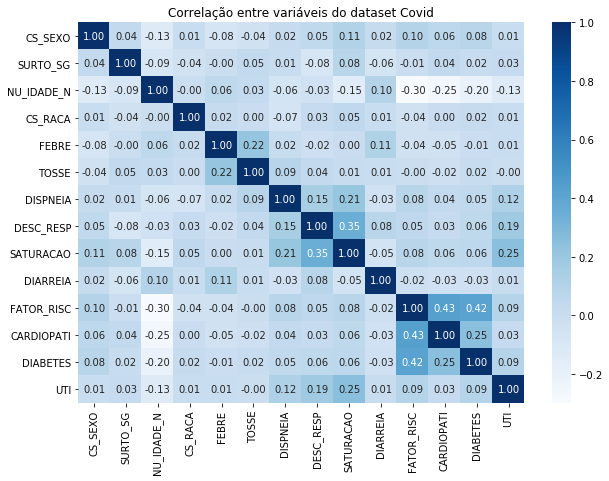

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(covidDataWithoutNaN.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset Covid')
plt.show()